# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# mouse_metadata.info()
# study_results.info()

combined = pd.merge(mouse_metadata, study_results, on ="Mouse ID")
# Display the data table for preview

combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

combined["Duplicated"] = combined.duplicated(subset=['Mouse ID','Timepoint'],keep=False)



In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicatesonly = combined.loc[combined['Duplicated'] == True,:]

duplicatesonly


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleanresults = combined.loc[combined['Mouse ID'] != 'g989',:]

cleanresults.drop(columns=['Duplicated'])


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleanresults["Mouse ID"].nunique()




248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
def sem(data):
    sem_value = data.sem()
    return sem_value

summary = cleanresults.groupby(['Drug Regimen'],as_index = True).agg({'Tumor Volume (mm3)':['mean','median','std','var',sem]})

grouped_df = pd.DataFrame(summary)

grouped_df




Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

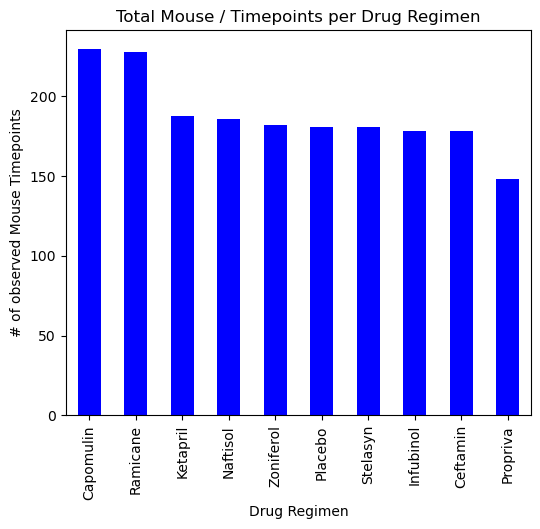

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

MouseTimes = cleanresults["Drug Regimen"].value_counts()

FirstBarChart = MouseTimes.plot(kind="bar", facecolor="blue", figsize=(6,5),
                                title="Total Mouse / Timepoints per Drug Regimen",
                                xlabel="Drug Regimen",ylabel="# of observed Mouse Timepoints")


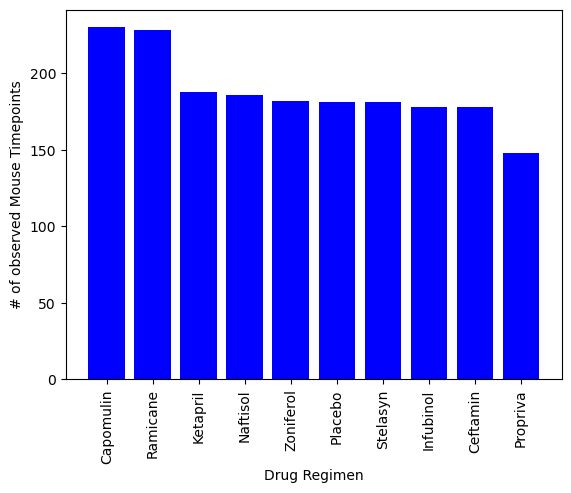

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_counts= cleanresults["Drug Regimen"].value_counts()

x_axis= drug_counts.index
y_axis = drug_counts.values

plt.bar(x_axis,y_axis,color="blue")

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(rotation=90)

plt.show()


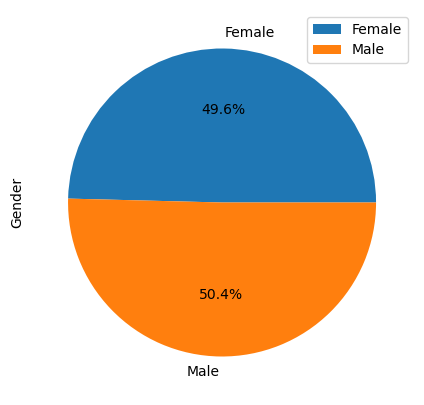

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

micegender = cleanresults.groupby(cleanresults["Sex"]).agg({"Mouse ID":['nunique']})

# Make the pie chart
pieplot = micegender.plot(kind="pie",ylabel='Gender', figsize=(5, 5), autopct='%1.1f%%', subplots=True)

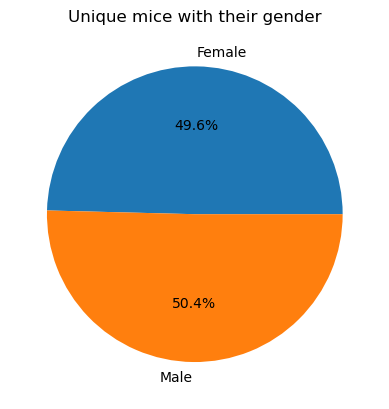

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender)
micegender = cleanresults.groupby(cleanresults["Sex"]).agg(uniquemice=("Mouse ID",'nunique'))

micegender_df = pd.DataFrame(micegender)

# Make the pie chart

plt.pie(micegender["uniquemice"], labels = ['Female','Male'],autopct='%1.1f%%')
plt.title("Unique mice with their gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

greatesttimes= cleanresults.groupby(cleanresults["Drug Regimen"]).agg(Timepoint=("Timepoint",'max'))

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatesttimes_results = pd.DataFrame(pd.merge(greatesttimes,cleanresults, on ='Timepoint', how="left"))

greatesttimes_results

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicated
0,45,k403,Ramicane,Male,21,16,22.050126,1,False
1,45,s185,Capomulin,Female,3,17,23.343598,1,False
2,45,x401,Capomulin,Female,16,15,28.484033,0,False
3,45,m601,Capomulin,Male,22,17,28.430964,1,False
4,45,g791,Ramicane,Male,11,16,29.128472,1,False
...,...,...,...,...,...,...,...,...,...
1295,45,y769,Ceftamin,Female,6,27,68.594745,4,False
1296,45,y865,Ceftamin,Male,23,26,64.729837,3,False
1297,45,z581,Infubinol,Female,24,25,62.754451,3,False
1298,45,z795,Naftisol,Female,13,29,65.741070,3,False


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
promisingtreatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volumes = []

for treatment in promisingtreatments:
    treatment_data = greatesttimes_results[greatesttimes_results['Drug Regimen'] == treatment]
    tumor_volumes.extend(treatment_data['Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles = tumor_volumes.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset

    # Determine outliers using upper and lower bounds


AttributeError: 'list' object has no attribute 'quantile'

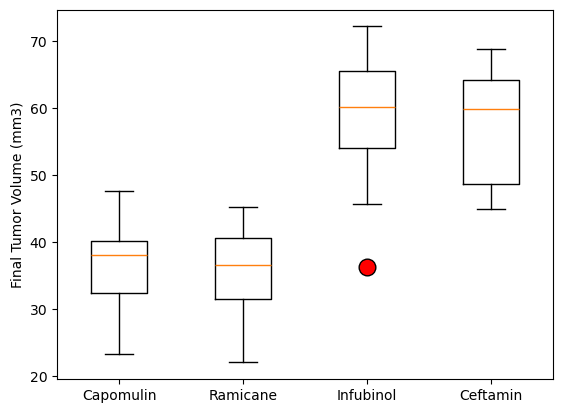

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

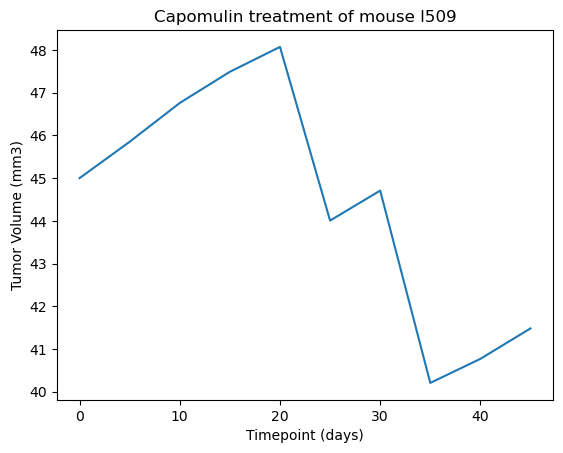

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


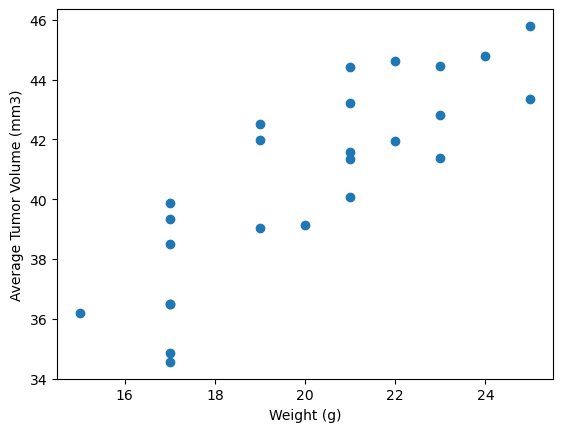

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


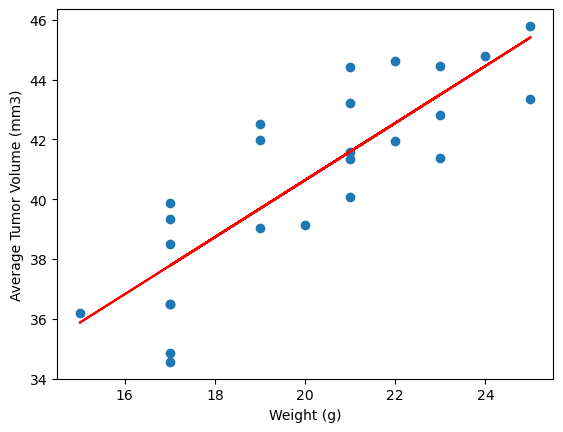

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
